# Peer-graded Assignment: Описательный анализ данных

Часто при работе с пользовательскими данными приходится сталкиваться с тем, что данные предоставляются для работы без описания. При этом не известно, что содержательно представляют собой те или иные признаки, а известны лишь их типы: числовые, категориальные, номинальные переменные. Такие ситуации - не редкость при работе с «чувствительными» данными, например, в сфере банковской аналитики, HR-аналитики, сфере телекоммуникаций, страхования, здравоохранения, недвижимости или ритейла. Тем не менее, с такими данным нужно уметь работать, и нужно уметь проводить на них классические этапы анализа, в частности описательный анализ данных и визуализацию. Именно этим мы займемся на первой неделе.


В этом задании мы потренируемся делать описательный анализ и визуализацию так называемых «закрытых» данных - данных, которые предоставляются для анализа и построения моделей без описания. Выборка, с которой мы будем работать прилагается.

* Метки классов (здесь `1` соответствует классу `отток`, `-1` - классу `не отток`) – `orange_small_churn_labels.train`
* Данные (предоставлены без описания, однако известно, что первые 190 переменных являются числовыми, а оставшиеся 40 - категориальными) – `orange_small_churn_data.train`

Скачайте эти файлы [на странице задания](https://www.coursera.org/learn/data-analysis-project/peer/roSOe/opisatiel-nyi-analiz-dannykh) и переходите к выполнению задачи! Результатом выполнения задания является jupyter notebook. Перед отправкой результата убедитесь, что вы выполнили все пункты из задания и это можно понять из вашего notebook'а. Проверьте, что код написан понятно и аккуратно - это поможет вашим сокурсником лучше понять, что вы сделали, и оценить вашу работу.

## Инструкции

1\. Загрузите данные `orange_small_churn_data.train` и `orange_small_churn_labels.train`

In [1]:
import math
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from pandas.plotting import scatter_matrix
import itertools as it
from matplotlib.colors import ListedColormap

In [2]:
data_df  = pd.read_csv('orange_small_churn_data.train.txt')
label_df = pd.read_csv('orange_small_churn_labels.train.txt', header=None, names=['target'])

data_df.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,3052.0,NaN,NaN,NaN,NaN,...,Al6ZaUT,vr93T2a,LM8l689qOp,NaN,NaN,fKCe,02N6s8f,xwM2aC7IdeMC0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,1813.0,7.0,NaN,NaN,NaN,...,oslk,6hQ9lNX,LM8l689qOp,NaN,ELof,xb3V,RAYp,55YFVY9,mj86,NaN
2,NaN,NaN,NaN,NaN,NaN,1953.0,7.0,NaN,NaN,NaN,...,zCkv,catzS2D,LM8l689qOp,NaN,NaN,FSa2,ZI9m,ib5G6X1eUxUn6,mj86,NaN
3,NaN,NaN,NaN,NaN,NaN,1533.0,7.0,NaN,NaN,NaN,...,oslk,e4lqvY0,LM8l689qOp,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,686.0,7.0,NaN,NaN,NaN,...,oslk,MAz3HNj,LM8l689qOp,NaN,NaN,WqMG,RAYp,F2FyR07IdsN7I,NaN,NaN


2\. Рассчитайте доли классов `отток` и `не отток`.

In [3]:

churn_df = data_df[label_df['target'] == 1]
loyal_df = data_df[label_df['target'] == -1]

print('доля оттока :', len(churn_df)/len(data_df), ',  доля не отттока :', len(loyal_df)/len(data_df))

доля оттока : 0.0744 ,  доля не отттока : 0.9256


3\. Рассчитайте корреляции переменных с целевой функцией и проанализируйте полученные данные.

Обратите внимание на то, что целевая функция предсталвляет собой бинарную переменную. Теоретически, это не помешает рассчиать, например, корреляцию Пирсона между непрерывной переменной и целевой функцией, онднако анализиоовать полученные результаты будет сложно, корреляция Пирсона просто не рассчитана на такое применение. Кто уже забыл, как действовать в такой ситуации - вспоминить можно вот здесь: https://www.coursera.org/teach/stats-for-data-analysis/content/edit/lecture/prX3S/video-subtitles 

In [4]:
num_corrs = (churn_df.iloc[:, :190].mean(axis=0) - loyal_df.iloc[:, :190].mean(axis=0)).abs()
print(' корреляции ', num_corrs[:10])

 корреляции  Var1          1.670494
Var2          0.005181
Var3        167.782993
Var4          0.016095
Var5      66949.866756
Var6        205.473217
Var7          1.706359
Var8               NaN
Var9          5.964219
Var10    101756.860975
dtype: float64


4\. Визуализируйте данные: рассмотрите топ 20 числовых переменных, наиболее сильно коррелирующих с целевой функцией. Для этих переменных постройте:
* Распределения в разрезе классов
* Отобразите объекты в координатах пар признаков

In [5]:
top_20_corrs = num_corrs.sort_values(ascending=False)[:20]
print ('лучшая 20-ка ',top_20_corrs)

лучшая 20-ка  Var131    1.034608e+07
Var69     4.808584e+05
Var53     4.389077e+05
Var177    4.017487e+05
Var180    3.201630e+05
Var114    2.416347e+05
Var111    1.931651e+05
Var113    1.628422e+05
Var153    1.514534e+05
Var154    1.417316e+05
Var59     1.306361e+05
Var124    1.220040e+05
Var10     1.017569e+05
Var33     9.808497e+04
Var139    9.586470e+04
Var38     7.767100e+04
Var5      6.694987e+04
Var182    6.161478e+04
Var36     5.799337e+04
Var92     5.758846e+04
dtype: float64


In [12]:
colors = ListedColormap(['blue', 'red'])

def plot_scatter(cols, n_cols, figsize=(16, 40)):
    plot_data = []
    
    for col_pair in it.combinations(cols, 2):
        col1, col2 = col_pair
        cols_df = pd.concat([data_df[[col1, col2]], label_df], axis=1)
        cols_df.dropna(inplace=True)
        if len(cols_df) > 0:
            plot_data.append((col1, col2, cols_df))
        
    n_rows = math.ceil(len(plot_data)/n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    
    legend_lines = [Line2D([0], [0], color='blue', lw=4),
                    Line2D([0], [0], color='red', lw=4)]
    plt.figlegend(legend_lines, ['Loyal', 'Churn'], loc = 'upper center', ncol=n_cols, labelspacing=0. )
        
    for idx, p in enumerate(plot_data): 
        col1, col2, cols_df = p
        i = idx//n_cols
        j = idx%n_cols
        ax = axes[i, j]
        ax.set_xlabel(col1)
        ax.set_ylabel(col2)
        ax.scatter(cols_df[col1], cols_df[col2], c=cols_df['target'], s=13, cmap = colors, alpha=0.5)
        
    plt.show() 


def plot_hist(cols, n_cols, figsize=(16, 10)):
    n_rows = math.ceil(len(cols)/n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    
    legend_lines = [Line2D([0], [0], color='blue', lw=4),
                    Line2D([0], [0], color='red', lw=4)]
    plt.figlegend(legend_lines, ['Loyal', 'Churn'], loc = 'upper center', ncol=n_cols, labelspacing=0. )

    for idx, col in enumerate(cols):
        i = idx//n_cols
        j = idx%n_cols
        ax = axes[i, j]
        ax.text(.5,.9, col, horizontalalignment='center', transform=ax.transAxes)
        
        x = data_df[col].dropna()
        x[label_df['target']==-1].hist(ax = ax, bins=15, color='blue', alpha=0.7, density=True)
        x[label_df['target']==1].hist(ax = ax, bins=15, color='red', alpha=0.7, density=True)
    
    plt.show()

Строим объекты в координатах пар признаков: 

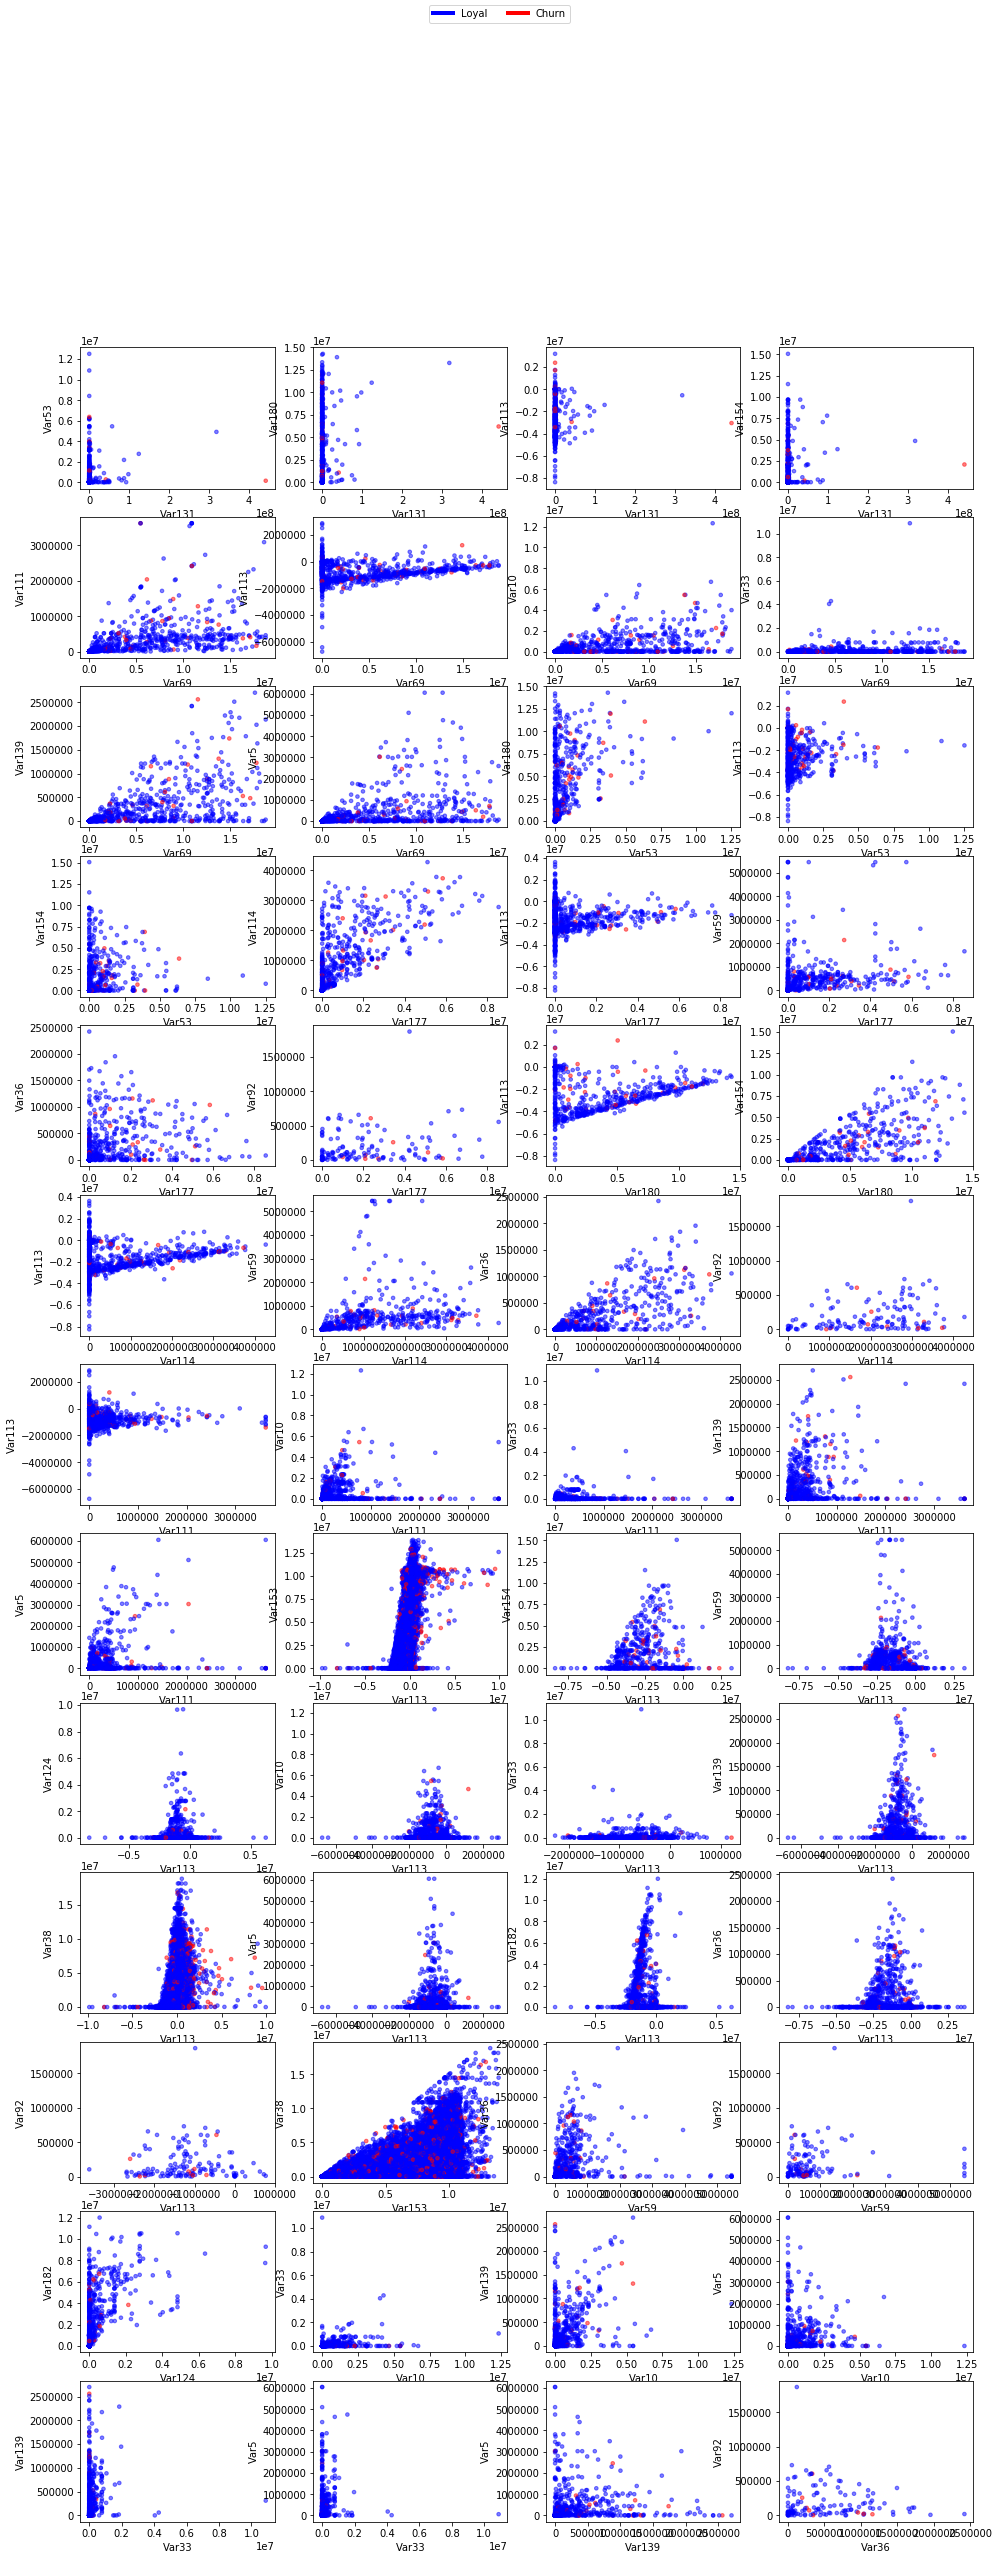

In [13]:
plot_scatter(top_20_corrs.index, 4)

Распределения в разрезе классов

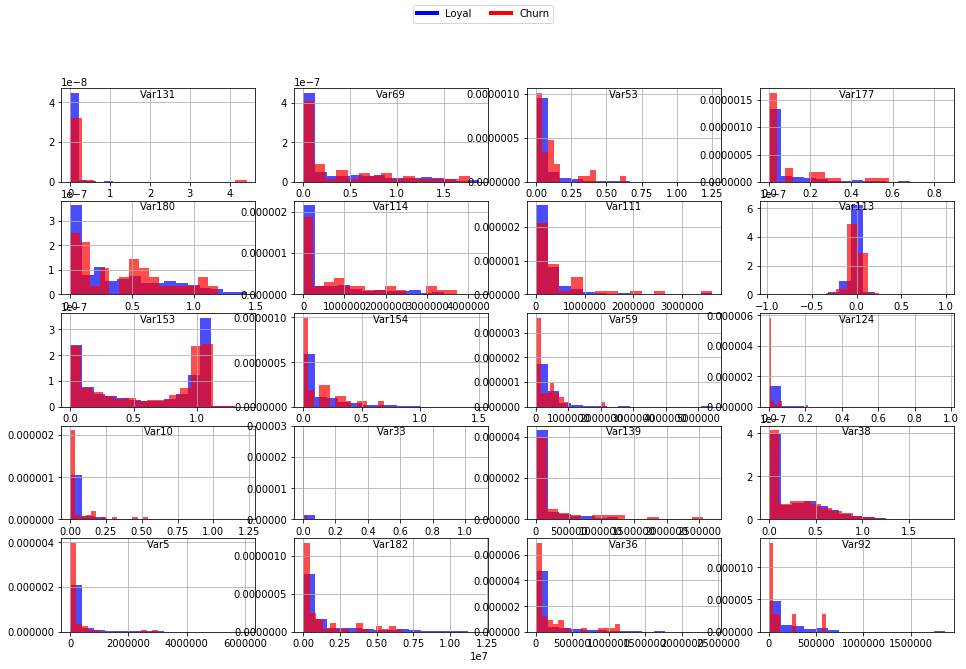

In [15]:
plot_hist(top_20_corrs.index, 4)

5\. Проделайте аналогичные шаги для случайно выбранных 10 числовых признаков.

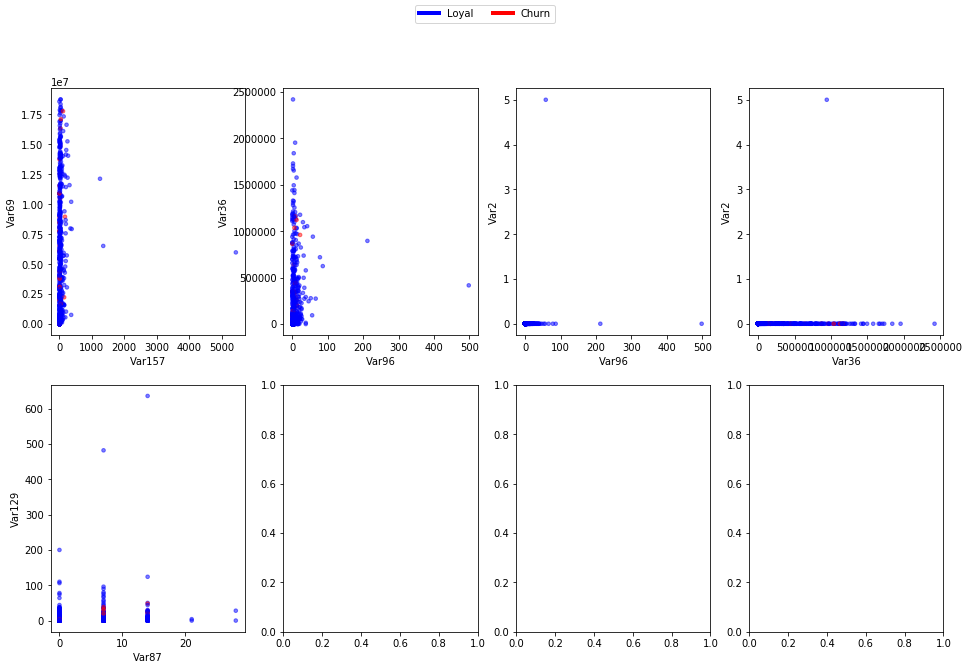

C:\Users\Mark\Anaconda3\lib\site-packages\numpy\lib\function_base.py:838: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


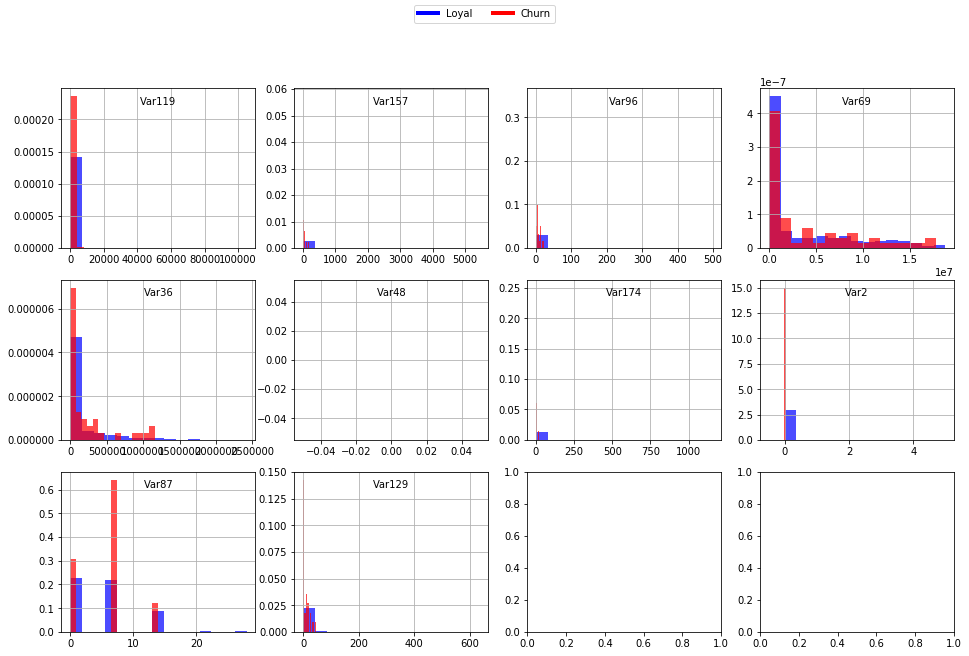

In [16]:
random.seed(9)
n_feats = 10
idxs = random.sample(range(190), n_feats)

cols = data_df.columns[idxs]
plot_scatter(cols, 4, figsize=(16, 10))
plot_hist(cols, 4)

6\. Проделайте аналогичные шаги для 10 числовых признаков, наименее сильно коррелирующих с целевой переменной.

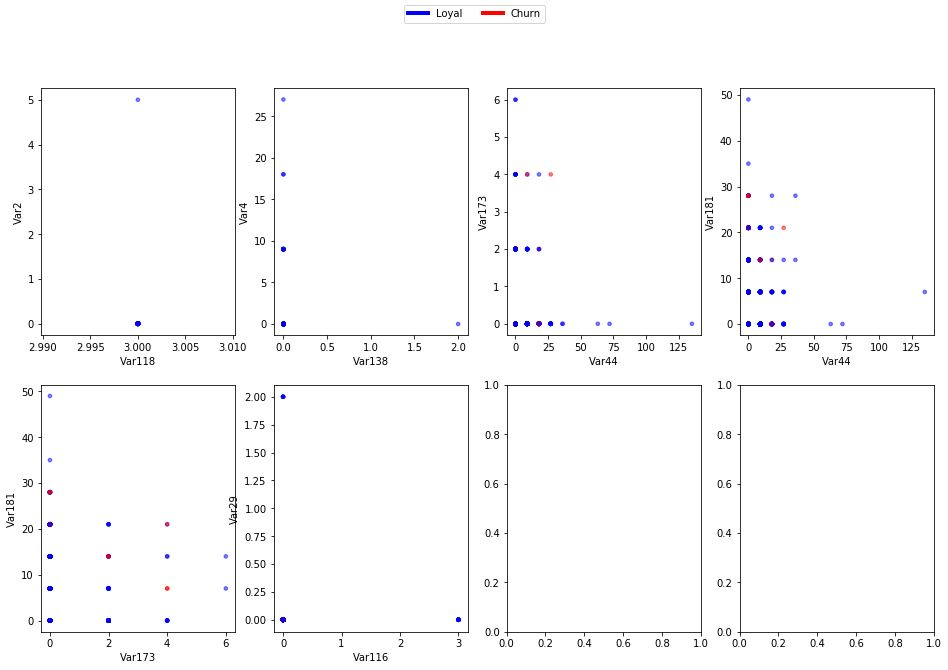

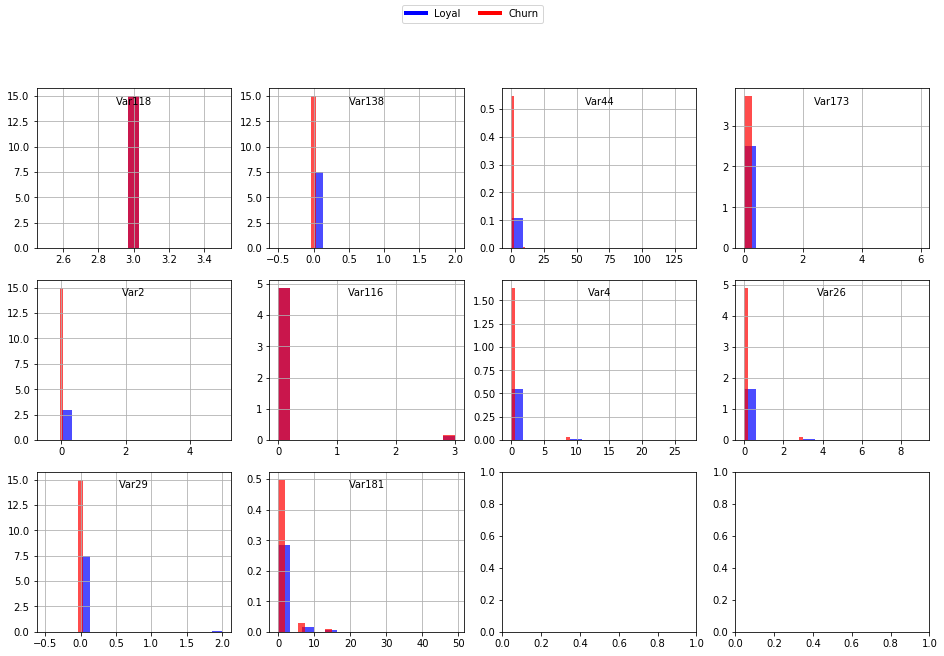

In [17]:
low10_corrs = num_corrs.sort_values(ascending=True)[:10]
plot_scatter(low10_corrs.index, 4, figsize=(16, 10))
plot_hist(low10_corrs.index, 4)

7\. Посмотрите на категориальные переменные: постройте и сравните гистограммы значений категориальных переменных для разных классов.

In [18]:
def plot_cat_classes(cols, n_cols, cat_limit=200, figsize=(16, 20)):
    plot_data = []
    
    for col in cols:
        x = data_df[col].dropna()
        x_loyal = x[label_df['target']==-1].value_counts()
        x_churn = x[label_df['target']==1].value_counts()

        if len(x_loyal)>cat_limit or len(x_churn)>cat_limit:
            continue
          
        plot_data.append((col, x_loyal,x_churn))

    n_rows = math.ceil(len(plot_data)/n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    
    legend_lines = [Line2D([0], [0], color='blue', lw=4),
                    Line2D([0], [0], color='red', lw=4)]
    plt.figlegend(legend_lines, ['Loyal', 'Churn'], loc = 'upper center', ncol=n_cols, labelspacing=0. )
        
    for idx, p in enumerate(plot_data): 
        col, x_loyal, x_churn = p
        i = idx//n_cols
        j = idx%n_cols
        ax = axes[i, j]
        ax.text(.5, .9, col, horizontalalignment='center', transform=ax.transAxes)
        
        if len(x_loyal) > 0:
            x_loyal.plot(ax = ax, kind='bar', color='blue', alpha=0.7)
        if len(x_churn) > 0:
            x_churn.plot(ax = ax, kind='bar', color='red', alpha=0.7)
        
    plt.show()

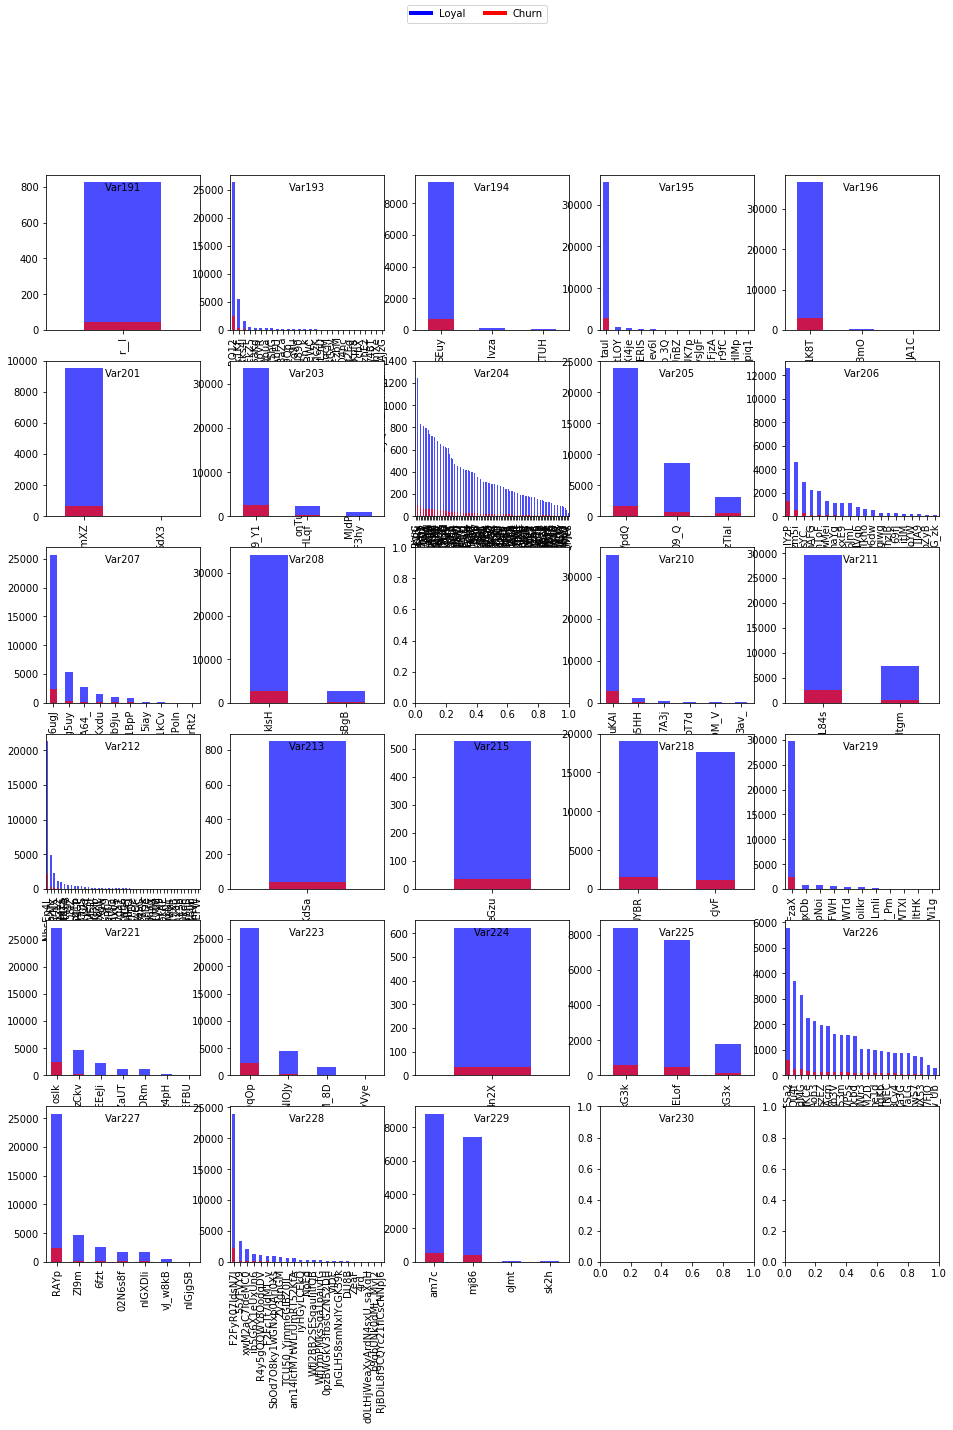

In [19]:
plot_cat_classes(data_df.columns.values[190:230], 5)

8\. Проанализируйте полученные результаты:
* Какие выводы вы можете сделать? Заметили ли вы какие-нибудь интересные закономерности?
* На основании полученных изображений и таблиц, предположите, какие переменные окажут наибольшее влияние (вклад) в модель?
* Какие переменные на ваш взгляд окажутся наименее полезными, шумовыми?
* Как вы думаете, окажется ли отбор признаков полезным для построения модели?

Выводы:

- По построенным гистограммам распределений сложно что-либо сказать даже для наиболее коррелирующих с целевой переменной признаков: распределения для обоих классов примерно совпадают. Наиболее визуально различны они для переменных 36, 53, 180. 
- По графикам парных признаков можно заметить, что облака классов имеют различимо разные центры для пар (53, 113), (53, 180), (180, 113), (153, 113), (154, 113), (38, 113) (с учетов дисбаланса классов). Так что, вероятно, наибольшее влияние на модель окажут переменные 38, 53, 113, 153, 154, 180.
- Наименее полезными, судя по парным графикам, окажутся переменные, наименее коррелирующие с целевой переменной, а именно: 116, 118, 183
- В данных присутствуют шумовые переменные, а также переменные с очень маленькой дисперсией. Так что отбор признаков может оказаться полезным.
